## Getting the libraries

In [1]:
import tweepy as tw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a twitter Developer account and get your profile

## Connecting to Twitter with API

In [2]:
consumer_key=""
consumer_secret=""
access_token=""
access_token_secret ="" 

In [7]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth,wait_on_rate_limit = True)

# Gathering the tweets regarding OMICRON

In [8]:
hashtag = "#Omicron"
query = tw.Cursor(api.search_tweets, q=hashtag,lang='en').items(429)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

Rate limit reached. Sleeping for: 28


[{'Tweet': 'RT @AamAadmiParty: .@ArvindKejriwal govt prepared to fight #Omicron :\n\n▪️Built a capacity for 3 LAKH TESTS/DAY\n▪️Prepared to deal with 1 LA…', 'Timestamp': datetime.datetime(2021, 12, 23, 13, 49, 12, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @NicholaKane_: BREAKING New #Omicron study in Scotland and it looks like good news. ‘Early national data suggests that Omicron is associ…', 'Timestamp': datetime.datetime(2021, 12, 23, 13, 49, 10, tzinfo=datetime.timezone.utc)}, {'Tweet': '#VIDEO | Prime Minister @narendramodi chairs #COVID19 review meeting\n\nvia ANI\n\n#Omicron https://t.co/Q7qbpL9t95', 'Timestamp': datetime.datetime(2021, 12, 23, 13, 49, 7, tzinfo=datetime.timezone.utc)}, {'Tweet': 'In 🇦🇷, at-home COVID19 tests are not yet approved (even with efficient and fast tests developed in 🇦🇷). This is in… https://t.co/VpzeAnCJLQ', 'Timestamp': datetime.datetime(2021, 12, 23, 13, 49, 2, tzinfo=datetime.timezone.utc)}, {'Tweet': '#France starts vaccinating #Children as g

# Setting up the dataset 

In [11]:
df=pd.DataFrame.from_dict(tweets)
print(df.shape)
df.head()

(429, 2)


,Tweet,Timestamp
0,RT @AamAadmiParty: .@ArvindKejriwal govt prepa...,2021-12-23 13:49:12+00:00
1,RT @NicholaKane_: BREAKING New #Omicron study ...,2021-12-23 13:49:10+00:00
2,#VIDEO | Prime Minister @narendramodi chairs #...,2021-12-23 13:49:07+00:00
3,"In 🇦🇷, at-home COVID19 tests are not yet appro...",2021-12-23 13:49:02+00:00
4,#France starts vaccinating #Children as govern...,2021-12-23 13:49:02+00:00


In [ ]:
df.to_csv('Dataset.csv') # Saving the dataset

# Importing SentimentIntensityAnalyzer and Wordcloud

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Data cleaning 
## Removing the stopword and handling unnecessary words

In [13]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAMESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df["Tweet"] = df["Tweet"].apply(clean)

# Previewing the cleaned dataset

In [16]:
df.head()

,Tweet,Timestamp
0,rt aamaadmiparti arvindkejriw govt prepar figh...,2021-12-23 13:49:12+00:00
1,rt nicholakan break new omicron studi scotland...,2021-12-23 13:49:10+00:00
2,video prime minist narendramodi chair review...,2021-12-23 13:49:07+00:00
3,🇦🇷 athom test yet approv even effici fast tes...,2021-12-23 13:49:02+00:00
4,franc start vaccin children govern race contai...,2021-12-23 13:49:02+00:00


# Visualising the tweets 

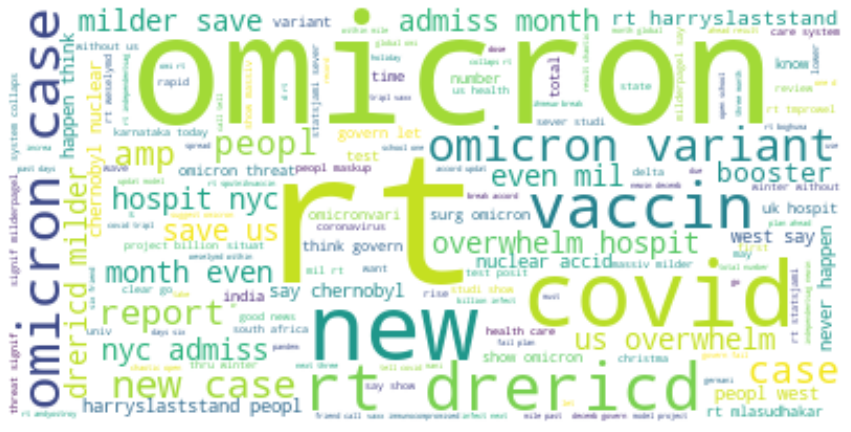

<Figure size 432x288 with 0 Axes>

In [23]:
Tweet = " ".join(i for i in df.Tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Tweet)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("WORDCLOUD.png") 

# Importing the vader_lexicon (Valence Aware Dictionary and sEntiment Reasoner)
### to analyse positive,negative and neutral tweets
 

In [18]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Tweet"]]
df = df[["Tweet", "Positive", "Negative", "Neutral"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RAMESH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Final dataset along with their state of each tweet

In [19]:
(df.head())

,Tweet,Positive,Negative,Neutral
0,rt aamaadmiparti arvindkejriw govt prepar figh...,0.000,0.178,0.822
1,rt nicholakan break new omicron studi scotland...,0.265,0.000,0.735
2,video prime minist narendramodi chair review...,0.000,0.000,1.000
3,🇦🇷 athom test yet approv even effici fast tes...,0.000,0.000,1.000
4,franc start vaccin children govern race contai...,0.187,0.000,0.813


# Calculating the Sentiment Score

In [24]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
        
sentiment_score(x, y, z)

Neutral 🙂 
